## NLP based on Lord of the Rings Trilogy

#### Preface
I have always been a huge fan of LOTR trilogy. This research will try to analyse umspoken secrets hidden under Tolkein's words.  

The dataset I use comes from this repo: https://github.com/wess/iotr

In [1]:
with open('lotr.txt', 'r', encoding='utf-8') as f:
    content = f.read()
content = content.split('* BOOK')
EP1 = content[0] + content[1] # The Fellowship of the Ring
EP2 = content[2] + content[3] # The Two Towers
EP3 = content[4] + content[5] # The Return of the King


In [19]:
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to convert nltk pos tags to wordnet pos tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match


lemmatizer = WordNetLemmatizer()
tagged_words = nltk.pos_tag(words)

lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_words]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patrick\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patrick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Patrick\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Patrick\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
stopwords_list = stopwords.words('english')
with open('stopwords1.txt', 'r', encoding='utf-8') as f:
    custom_stopwords = f.read().split(',')
# custom_stopwords = ['said', 'one', 'two', 'three', 'put', 'get', 'got', 'let', 'going', 'upon', 'would', 'could', 'shall', 'may', 'must', 'yet', 'us', 'see', 'go', 'went', 'come', 'came', 'like', 'also', 'though', 'much', 'many', 'even', 'still', 'ever', 'well', 'back', 'without', 'around', 'looked']
stopwords_list.extend(custom_stopwords)

stopwords_set = set(stopwords_list)
words = [word.lower() for word in lemmatized_words if word.isalpha() and word.lower() not in stopwords_set]

fdist = FreqDist(words)
for word, freq in fdist.most_common(100):
    print(f'{word}: {freq}')



bilbo: 777
frodo: 636
long: 481
know: 447
time: 425
hobbit: 417
think: 416
find: 378
gandalf: 371
great: 364
old: 344
seem: 340
away: 333
far: 329
leave: 329
last: 327
day: 327
good: 322
way: 315
light: 291
dark: 291
ring: 286
begin: 286
dwarf: 285
end: 277
little: 277
thing: 273
mountain: 272
tree: 270
look: 259
thorin: 251
soon: 228
give: 225
turn: 222
door: 215
behind: 214
night: 214
road: 210
hill: 208
eye: 207
merry: 206
hand: 204
sam: 204
never: 203
take: 198
side: 197
suddenly: 194
water: 192
goblin: 186
call: 179
strider: 178
stand: 176
sit: 175
river: 173
right: 173
fire: 171
land: 171
hear: 170
foot: 166
shire: 165
first: 161
baggins: 161
head: 161
fell: 158
cry: 158
open: 156
keep: 155
run: 154
stone: 153
near: 152
path: 152
black: 149
pippin: 148
tom: 147
forest: 147
voice: 145
pony: 144
heard: 142
use: 142
course: 141
gollum: 141
nothing: 137
dragon: 136
grow: 135
place: 132
friend: 130
something: 129
answer: 129
sound: 129
people: 128
wind: 128
pass: 128
king: 127
feel: 1

#### Word Cloud of 3 Episodes

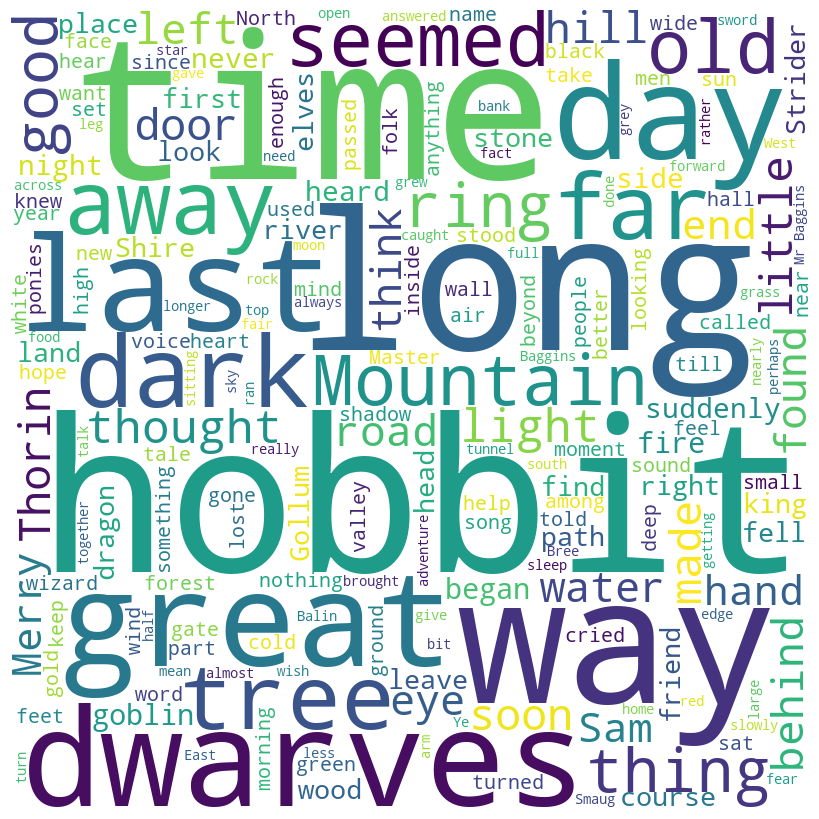

In [28]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords_set).generate(EP1)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('lotrWordCloud1.png')
plt.show()

In [26]:
stopwords_list = stopwords.words('english')
with open('stopwords2.txt', 'r', encoding='utf-8') as f:
    custom_stopwords = f.read().split(',')
# custom_stopwords = ['said', 'one', 'two', 'three', 'put', 'get', 'got', 'let', 'going', 'upon', 'would', 'could', 'shall', 'may', 'must', 'yet', 'us', 'see', 'go', 'went', 'come', 'came', 'like', 'also', 'though', 'much', 'many', 'even', 'still', 'ever', 'well', 'back', 'without', 'around', 'looked']
stopwords_list.extend(custom_stopwords)

stopwords_set = set(stopwords_list)
words = [word.lower() for word in lemmatized_words if word.isalpha() and word.lower() not in stopwords_set]

fdist = FreqDist(words)
for word, freq in fdist.most_common(100):
    print(f'{word}: {freq}')

long: 481
time: 425
hobbit: 417
think: 416
find: 378
great: 364
old: 344
away: 333
far: 329
leave: 329
last: 327
day: 327
good: 322
way: 315
light: 291
dark: 291
ring: 286
begin: 286
dwarf: 285
end: 277
little: 277
thing: 273
mountain: 272
tree: 270
look: 259
thorin: 251
soon: 228
give: 225
turn: 222
door: 215
behind: 214
night: 214
road: 210
hill: 208
eye: 207
merry: 206
hand: 204
sam: 204
never: 203
take: 198
side: 197
suddenly: 194
water: 192
goblin: 186
call: 179
strider: 178
stand: 176
sit: 175
river: 173
right: 173
fire: 171
land: 171
hear: 170
foot: 166
shire: 165
first: 161
baggins: 161
head: 161
fell: 158
cry: 158
open: 156
keep: 155
run: 154
stone: 153
near: 152
path: 152
black: 149
forest: 147
voice: 145
pony: 144
heard: 142
use: 142
course: 141
gollum: 141
nothing: 137
dragon: 136
grow: 135
place: 132
friend: 130
something: 129
answer: 129
sound: 129
people: 128
wind: 128
pass: 128
king: 127
feel: 127
shadow: 127
help: 126
sun: 126
men: 125
year: 124
want: 122
follow: 122
t

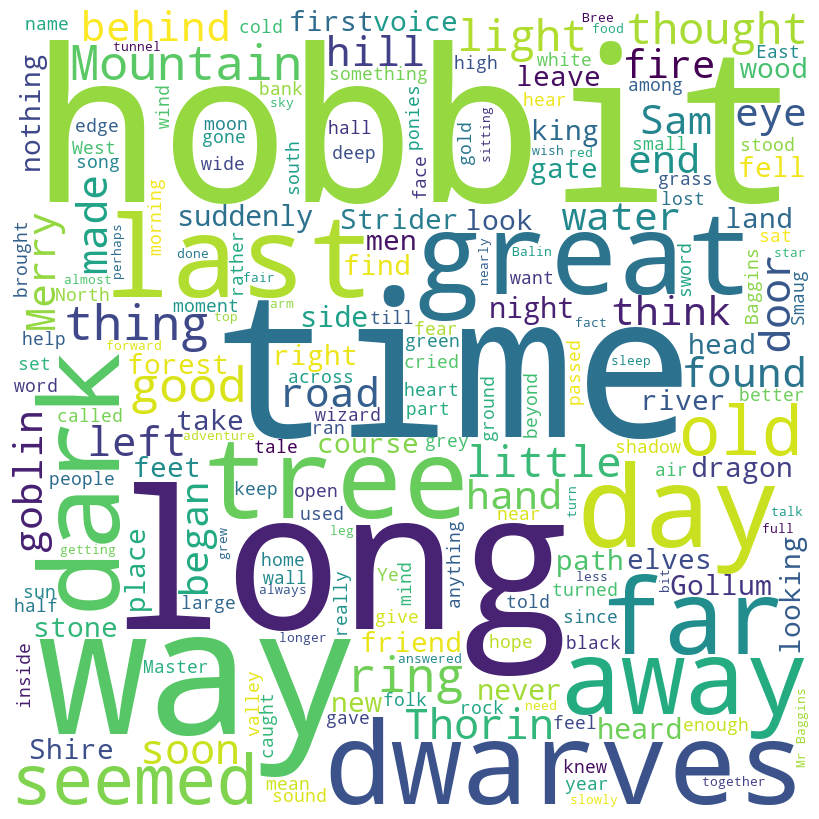

In [29]:
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords_set).generate(EP1)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('lotrWordCloud2.png')
plt.show()